# Understand Mixup Augmentation & Beta Distribution

Implementation
In the original article, the authors suggested three things:

1. Create two separate dataloaders and draw a batch from each at every iteration to mix them up
2. Draw a t value following a beta distribution with a parameter alpha (0.4 is suggested in their article)
3. Mix up the two batches with the same value t.
4. Use one-hot encoded targets

Source: https://forums.fast.ai/t/mixup-data-augmentation/22764 (Sylvain Gugger)

## Beta Distribution
Beta distribution is control by two parameters, α and β with interval [0, 1], which make it useful for Mixup. Mixup is basically a superposition of two image with a parameter t. Instead of using a dog image, with Mixup, you may end up have a image which is 0.7 dog + 0.3 cat

To get some sense of what a beta distribution is, let plot beta distribution with different alpha and beta to see its effect

In [4]:
import math
import torch
import matplotlib.pyplot as plt
from torch import tensor

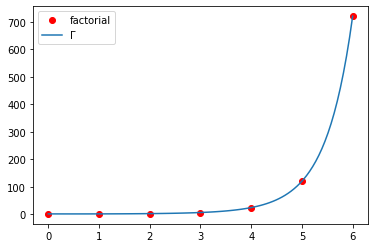

In [5]:
# PyTorch has a log-gamma but not a gamma, so we'll create one
Γ = lambda x: x.lgamma().exp()
facts = [math.factorial(i) for i in range(7)]

plt.plot(range(7), facts, 'ro')
plt.plot(torch.linspace(0,6), Γ(torch.linspace(0,6)+1))
plt.legend(['factorial','Γ']);

# When α != β 

C:\ProgramData\Anaconda3\envs\fastai2\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


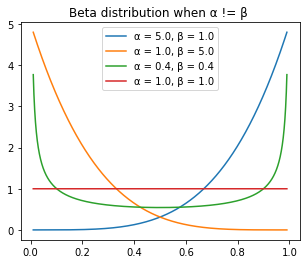

In [6]:
_,ax = plt.subplots(1,1, figsize=(5,4))
x = torch.linspace(0.01,0.99, 100000)
a_ls = [5.0,1.0,0.4, 1.0]
b_ls = [1.0,5.0,0.4, 1.0]

for a, b in zip(a_ls, b_ls):
    a=tensor(a,dtype=torch.float)
    b=tensor(b,dtype=torch.float)
#     y = (x.pow(α-1) * (1-x).pow(α-1)) / (gamma_func(α ** 2) / gamma_func(α))
    y = (x**(a-1) * (1-x)**(b-1)) / (Γ(a)*Γ(b) / Γ(a+b))
    ax.plot(x,y)
#     ax.set_title(f"α={a.numpy()[0]:.1}")
    ax.set_title('Beta distribution when α != β ')
    ax.legend([f'α = {float(a):.2}, β = {float(b):.2}' for a,b in zip(a_ls, b_ls)])

A few observations from this graph.
* α and β control the curve symmetrically, the blue line is symmetric with the orange line.
* when α and β = 1, it reduce to uniform distribution
* when α = β, the distribution is a symmetric distribution

# When α != β 

C:\ProgramData\Anaconda3\envs\fastai2\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


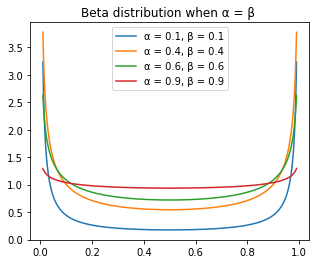

In [8]:
_,ax = plt.subplots(1,1, figsize=(5,4))
x = torch.linspace(0.01,0.99, 100000)
a_ls = [0.1, 0.4, 0.6, 0.9]
b_ls = [0.1, 0.4, 0.6, 0.9]

for a, b in zip(a_ls, b_ls):
    a=tensor(a,dtype=torch.float)
    b=tensor(b,dtype=torch.float)
#     y = (x.pow(α-1) * (1-x).pow(α-1)) / (gamma_func(α ** 2) / gamma_func(α))
    y = (x**(a-1) * (1-x)**(b-1)) / (Γ(a)*Γ(b) / Γ(a+b))
    ax.plot(x,y)
#     ax.set_title(f"α={a.numpy()[0]:.1}")
    ax.set_title('Beta distribution when α = β ')
    ax.legend([f'α = {float(a):.2}, β = {float(b):.2}' for a,b in zip(a_ls, b_ls)])

As we remember, when α = β =1, it is an uniform distribution. When α = β , when α is small, most density is concentrated around 0 and 1, and when α increase, the distribution get more evenly distributed.

The default for α suggested by the paper is 0.4